<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASE 1 - CUSTOMER SEGMENTATION  </h1> </center> <br>
<center> PROJECT 2021/2022 - MDSAA-BA </center>

**GROUP BY:**    <br> 
- Beatriz Ferreira (20210630) <br>
- Beatriz Peres (20210910) <br>
- Diogo Marques (20210605) <br>
- Miriam Hadidi (20210644)

In [59]:
import sqlite3
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pip

!pip install missingno
import missingno as msno

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from pandas_profiling import ProfileReport
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

! pip install graphviz

from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from collections import Counter

!pip install kmodes
#from kmodes.kprototypes import KPrototypes

!pip install plotnine
#import plotnine

!pip install plotnine
#from plotnine import *

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

! pip install sompy
#import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView



ModuleNotFoundError: No module named 'sompy'

In [11]:
%matplotlib inline

## Import Dataset

In [12]:
data_wine = pd.read_excel('WonderfulWinesoftheWorld.xlsx')

# Data Preparation

In [13]:
# check if every Customer ID is unique
data_wine['Custid'].is_unique

True

### Explore Datatypes

In [14]:
# Set the indexes as new index
data_wine.set_index("Custid", inplace = True)
data_wine.dtypes

Dayswus        float64
Age            float64
Edu            float64
Income         float64
Freq           float64
Recency        float64
Monetary       float64
LTV            float64
Perdeal        float64
Dryred         float64
Sweetred       float64
Drywh          float64
Sweetwh        float64
Dessert        float64
Exotic         float64
WebPurchase    float64
WebVisit       float64
dtype: object

### Duplicated Values

In [15]:
# Check if there are any duplicated values
data_wine.duplicated().sum() 

0

### Checking Missing Values

In [16]:
# Check if there are any missing values
data_wine.isna().sum()

Dayswus        0
Age            0
Edu            0
Income         0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
dtype: int64

In [17]:
# Define the initial set of metric features
metric_features = data_wine.columns

### Checking Outliers

In [18]:
# Check histograms and boxplots, to verify if there any possible observations to classify as outliers.
# As it´s possible to notice there are no observations to classify as outliers

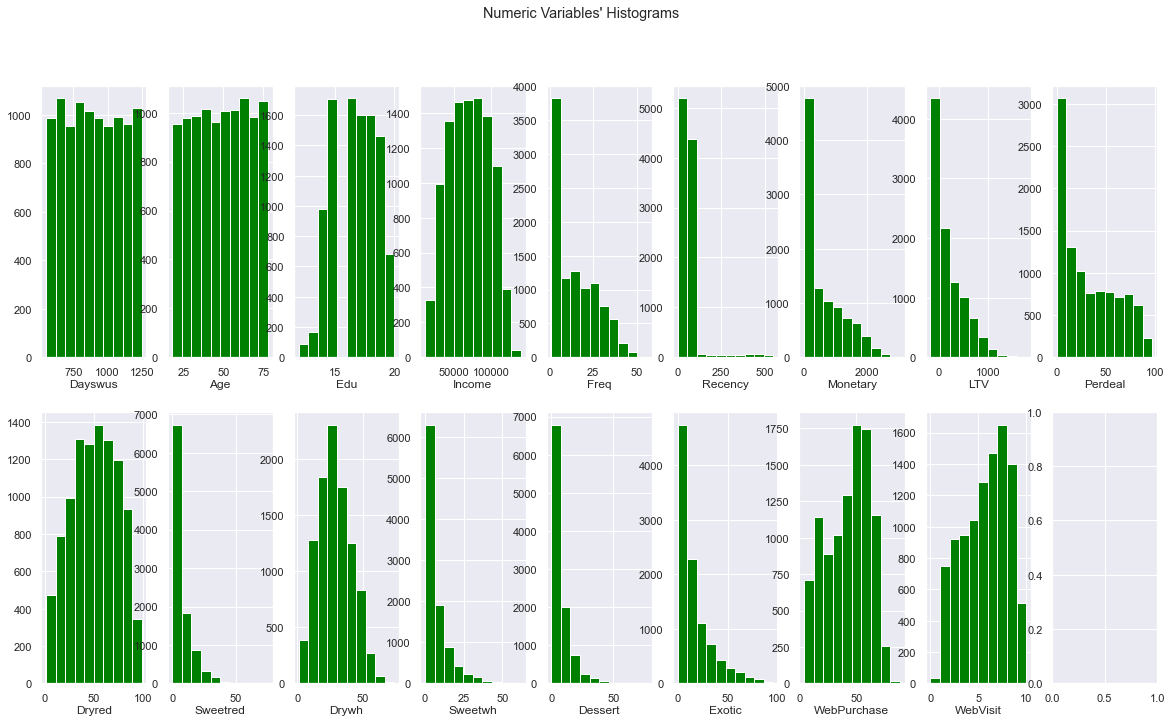

In [19]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(data_wine[feat], color = 'green')
    ax.set_title(feat, y=-0.13)
    

title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()


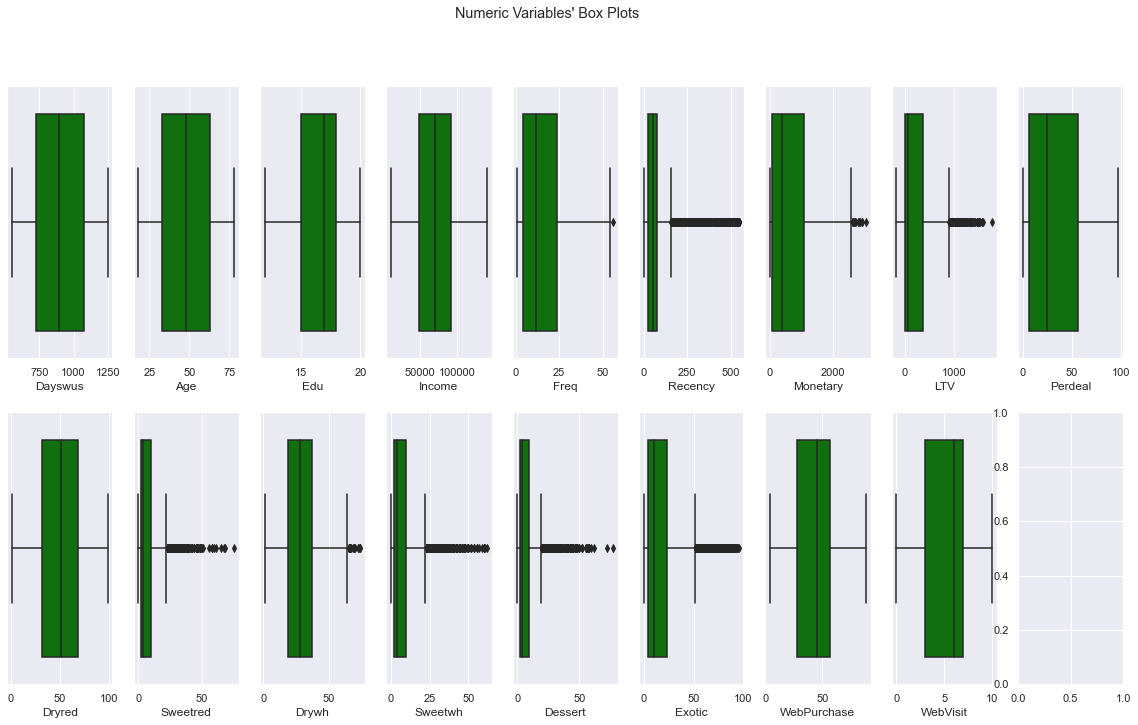

In [20]:
from math import ceil
# All Numeric Variables' Box Plots in one figure
sns.set()
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=data_wine[feat], ax=ax, color = 'green')
    
# Layout
title = "Numeric Variables' Box Plots"
plt.suptitle(title)

plt.show()

### Descriptive Statistics

In [21]:
# Check the statistics, where it´s possible to notice that there´s no presence of strange
# values or inchoerencies
data_wine.describe().T

count        mean           std      min      25%      50%  \
Dayswus      10001.0    898.1020    202.482664    550.0    724.0    894.0   
Age          10001.0     47.9273     17.301856     18.0     33.0     48.0   
Edu          10001.0     16.7391      1.876281     12.0     15.0     17.0   
Income       10001.0  69904.3580  27610.852665  10000.0  47646.0  70009.0   
Freq         10001.0     14.6281     11.968475      1.0      4.0     12.0   
Recency      10001.0     62.4068     69.870762      0.0     26.0     52.0   
Monetary     10001.0    622.5552    647.102966      6.0     63.0    383.0   
LTV          10001.0    209.0712    291.971441   -178.0     -2.0     57.0   
Perdeal      10001.0     32.3972     27.895699      0.0      6.0     25.0   
Dryred       10001.0     50.3827     23.452643      1.0     32.0     51.0   
Sweetred     10001.0      7.0545      7.866151      0.0      2.0      4.0   
Drywh        10001.0     28.5213     12.583328      1.0     19.0     28.0   
Sweetwh      10001.0      7.0698      8.014682      0.0      2.0      4.0   
Dessert      10001.0      6.9474      7.879152      0.0      2.0      4.0   
Exotic       10001.0     16.5466     17.246809      0.0      4.0     10.0   
WebPurchase  10001.0     42.3762     18.521136      4.0     28.0     45.0   
WebVisit     10001.0      5.2166      2.330340      0.0      3.0      6.0   

                 75%       max  
Dayswus       1074.0    1250.0  
Age             63.0      78.0  
Edu             18.0      20.0  
Income       92147.0  140628.0  
Freq            24.0      56.0  
Recency         78.0     549.0  
Monetary      1077.0    3052.0  
LTV            364.0    1791.0  
Perdeal         56.0      97.0  
Dryred          69.0      99.0  
Sweetred        10.0      75.0  
Drywh           37.0      74.0  
Sweetwh         10.0      62.0  
Dessert          9.0      77.0  
Exotic          23.0      96.0  
WebPurchase     57.0      88.0  
WebVisit         7.0      10.0

# Data Pre-Processing

### Dimensionality Reduction - Redundancy

In [22]:
# Verify correlations between each pair of variables
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    matrix = np.triu(cor)
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Greens, fmt='.1', mask = matrix)
    plt.show()

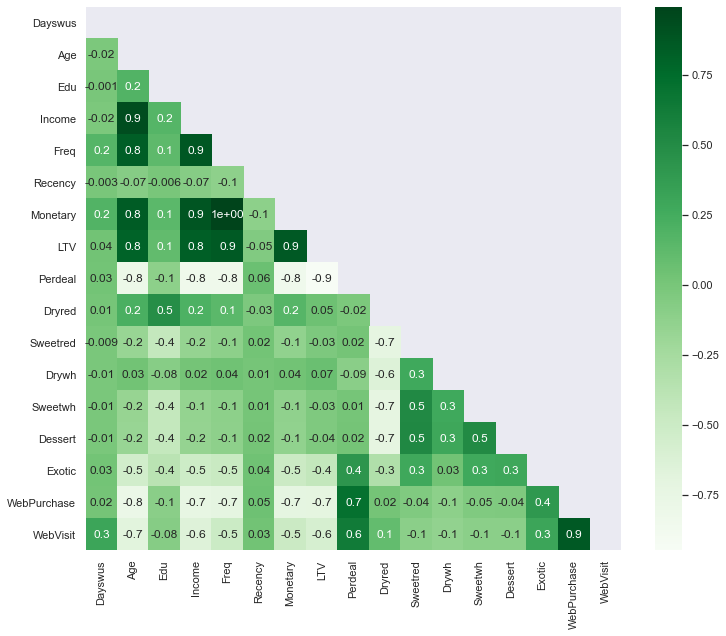

In [23]:
cor_spearman = data_wine[metric_features].corr(method ='spearman')
cor_heatmap(cor_spearman)

In [24]:
# After analyzing the heatmap, we decided to drop some highly correlated variables
data_wine.drop(["Freq", "Monetary", "WebVisit","Income", "Recency", "Edu"], axis = 1, inplace = True)

In [25]:
metric_features2 = data_wine.columns

## Feature Scaling

In [26]:
df_standard = data_wine.copy()

In [27]:
# Scale the data using Standard Scaler
scaler_ss = StandardScaler().fit(df_standard[metric_features2])
scaled_feat = scaler_ss.transform(df_standard[metric_features2])
scaled_feat

array([[-1.21054440e+00,  4.08803177e-01,  8.08094777e-01, ...,
        -7.54865182e-01, -9.01463981e-01, -3.44283356e-01],
       [ 7.05764839e-01,  1.56480634e+00,  1.13006017e+00, ...,
        -5.01018061e-01, -9.59448620e-01, -1.20820445e+00],
       [-1.14633816e+00, -1.72980267e+00, -7.40079245e-01, ...,
         1.78360602e+00,  1.82381403e+00,  9.51598288e-01],
       ...,
       [ 1.03173497e+00, -8.62800298e-01, -7.09252771e-01, ...,
         7.68217540e-01, -2.05648319e-01,  9.51598288e-01],
       [ 3.99550476e-01,  4.08803177e-01,  2.87469885e-01, ...,
        -5.01018061e-01, -7.27510066e-01, -4.52273492e-01],
       [ 0.00000000e+00,  4.10694823e-16,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [28]:
df_standard[metric_features2] = scaled_feat
df_standard.head()

Dayswus       Age       LTV   Perdeal    Dryred  Sweetred     Drywh  \
Custid                                                                         
5325.0 -1.210544  0.408803  0.808095 -0.910480  0.708582 -0.388329 -0.200378   
3956.0  0.705765  1.564806  1.130060 -1.089728 -0.058960 -0.896862  1.389106   
3681.0 -1.146338 -1.729803 -0.740079  1.993339 -1.977816  2.790005 -1.154069   
2829.0  0.745276 -0.342599 -0.736654  1.348046  1.518766 -0.769729 -1.392491   
8788.0 -0.301779 -0.053598 -0.702402  0.093309  1.476125 -0.896862 -1.313017   

         Sweetwh   Dessert    Exotic  WebPurchase  
Custid                                             
5325.0 -0.632596 -0.754865 -0.901464    -0.344283  
3956.0 -0.757373 -0.501018 -0.959449    -1.208204  
3681.0  3.110722  1.783606  1.823814     0.951598  
2829.0 -0.757373 -0.754865  2.229706     0.897603  
8788.0 -0.632596 -0.754865  0.664121     1.113583

In [29]:
# We decided to work with the standard normalization, since it standardizes
# the mean and standard deviation values as well
data_wine = df_standard.copy()

# Clustering Methods

### Spliting our features into perspectives

In [30]:
# Split all the variables between two workable perspectives
# These perspectives are the ones to work on when applying the clustering methods
value_features = ['Dayswus','Age','LTV', 'Perdeal', 'WebPurchase']

buying_behaviour_features = ['Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert', 'Exotic']

df_value = data_wine[value_features]
df_behaviour = data_wine[buying_behaviour_features]

### Defining cluster profiles for posterior analysis

In [31]:
# Create a function that will show us, the profile of each cluster after 
# creating the clusters with each of the studied methods
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
       
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [32]:
# Create a function to compute the r squared for each linkage method used in hierarchical clustering
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=1, max_k=13):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

hierarchical = AgglomerativeClustering(
    affinity='euclidean'
)

In [33]:
def r2_scores(dataframe):
    r2_scores = {}

    for linkage in ['complete', 'average', 'single', 'ward']:
        r2_scores[linkage] = get_r2_scores(dataframe, hierarchical.set_params(linkage=linkage))  
    
    return pd.DataFrame(r2_scores)

## K-Means + Hierarchical clustering

### Value Perspective

In [34]:
# Initialize the K-Means method, with a high number of initial clusters
kmeans_value = KMeans(n_clusters=35, init = 'k-means++', n_init=20, random_state=93)
km_value_labels = kmeans_value.fit_predict(df_value)

In [35]:
df_km_value = pd.concat([df_value, pd.Series(km_value_labels, name='km_value_labels', index=df_value.index)], axis=1)

In [36]:
#value_r2_scores = r2_scores(df_value)

# Visualizing the R² scores for each cluster solution on value variables
#value_r2_scores.plot.line(figsize=(10,7))

#plt.title("Value Variables:\nR² plot for various clustering methods\n", fontsize=21)
#plt.legend(title="Cluster methods", title_fontsize=11)
#plt.xlabel("Number of clusters", fontsize=13)
#plt.ylabel("R² metric", fontsize=13)
#plt.show()

In [37]:
# Take the centroids from the previous clusters
centroids = pd.DataFrame(kmeans_value.cluster_centers_, columns = df_value.columns)

In [38]:
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', distance_threshold=0, n_clusters=None)

hclust_labels = hclust.fit_predict(centroids)

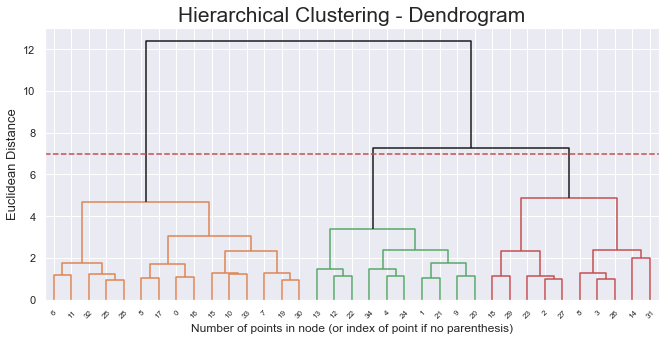

In [39]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)


for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)


sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 7
dendrogram(linkage_matrix, truncate_mode='level', labels=centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [40]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=2
)
hclust_labels = hclust.fit_predict(centroids)
centroids['hclust_labels'] = hclust_labels

centroids # centroid's cluster labels

Dayswus       Age       LTV   Perdeal  WebPurchase  hclust_labels
0   0.038122 -0.476733 -0.775848  1.465726     0.429401              1
1  -0.045553  0.103451 -0.114575 -0.614922     0.375931              0
2  -1.164098  1.352608  1.525162 -1.105074    -1.470413              0
3   0.208255  1.334068  1.971075 -1.103924    -1.506257              0
4   1.141183  0.092736  0.079083 -0.557616     0.611805              0
5  -1.265974 -1.148120 -0.735432  1.444520     1.214695              1
6   0.712859 -1.394562 -0.751725  1.451684    -0.060237              1
7   0.067445 -1.229470 -0.638542 -0.192227     1.012343              1
8   1.046891  1.172339  0.883344 -1.028428    -1.456334              0
9  -0.043377  0.442181 -0.566023  0.157940    -0.416023              0
10 -1.127600 -0.096838 -0.727006  0.759674     0.530354              1
11  1.229212 -0.446110 -0.830533  1.385301     0.360123              1
12  1.322870  0.826317  1.394417 -0.916010    -0.257259              0
13  1.177548  0.572718  0.129069 -0.585259    -0.565802              0
14  1.124258  1.387553  3.256927 -1.112911    -1.320154              0
15 -1.165941  0.090380 -0.423353 -0.445639     0.575865              1
16 -0.092686 -1.168288 -0.747159  1.700647     1.190227              1
17 -1.160531 -0.823819 -0.751390  1.551472     0.239617              1
18 -1.196315  0.608438 -0.241560 -0.599058    -0.557774              0
19 -1.248632 -1.231298 -0.697589  0.183956     1.004783              1
20 -0.081211  0.686474  0.058792 -0.725732    -0.685587              0
21  0.014038 -0.147784 -0.618862  0.206265     0.665867              0
22  0.221881  0.789665  1.072413 -0.932086    -0.250033              0
23 -0.208466  1.298459  0.887989 -1.068652    -1.480981              0
24  1.179002 -0.045371 -0.600573  0.304482     0.418348              0
25  1.272170 -1.169722 -0.757923  1.519383     1.152194              1
26  1.199995  1.344615  1.887417 -1.095581    -1.517850              0
27 -1.202231  1.211734  0.534945 -1.055140    -1.441761              0
28  0.549613 -1.118744 -0.730672  0.913553     1.145944              1
29 -1.044188  0.896770  0.700021 -0.940814    -0.132457              0
30 -0.459914 -1.180097 -0.717238  0.715915     1.041214              1
31 -0.765785  1.441002  2.689880 -1.122339    -1.478180              0
32  1.255168 -1.213055 -0.660773  0.231409     1.004235              1
33 -1.001206 -0.759396 -0.640310  0.057789    -0.250907              1
34  0.938837 -0.902559 -0.499249 -0.171522    -0.276243              0

In [41]:
# Mapper between concatenated hierarchical clusters
cluster_mapper = centroids['hclust_labels'].to_dict()

# Mapping the hierarchical clusters on the centroids to the observations
df_km_value['kmeans_labels'] = df_km_value.apply(
    lambda row: cluster_mapper[(row['km_value_labels'])], axis=1)

df_km_value.drop('km_value_labels', axis=1, inplace=True)

In [42]:
df_km_value.groupby('kmeans_labels').mean()

Dayswus       Age       LTV   Perdeal  WebPurchase
kmeans_labels                                                     
0              0.140172  0.711140  0.576854 -0.693049    -0.615956
1             -0.170662 -0.865825 -0.702330  0.843798     0.749937

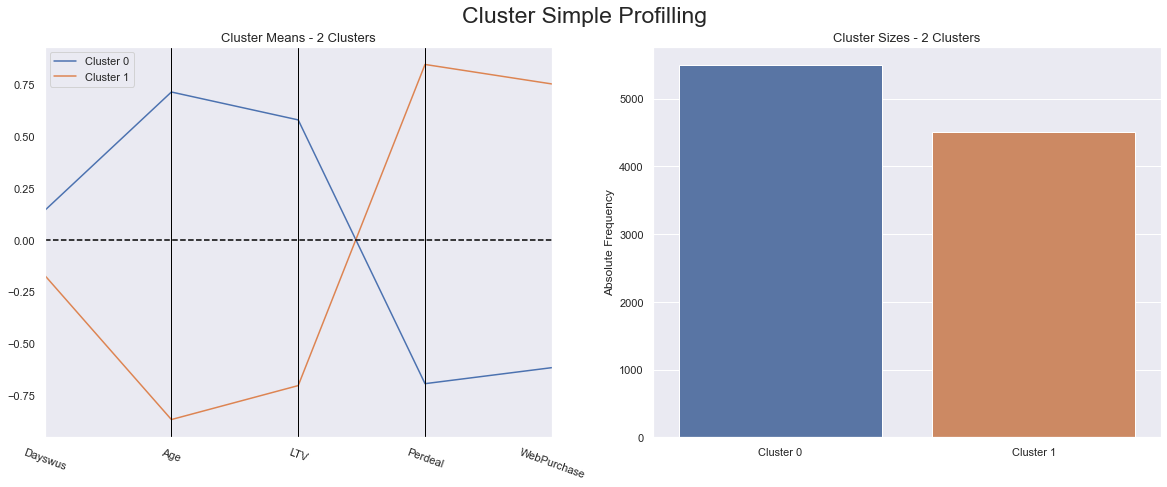

In [43]:
cluster_profiles(df_km_value, ['kmeans_labels'], (20,7))

### Behaviour Perspective

In [44]:
kmeans_behaviour = KMeans(n_clusters=35, init = 'k-means++', n_init=20, random_state=93)
km_behaviour_labels = kmeans_behaviour.fit_predict(df_behaviour)

In [45]:
df_km_behaviour = pd.concat([df_behaviour, pd.Series(km_behaviour_labels, name='km_behaviour_labels', index=df_behaviour.index)], axis=1)

In [46]:
#value_r2_scores = r2_scores(df_behaviour)

# Visualizing the R² scores for each cluster solution on value variables
#value_r2_scores.plot.line(figsize=(10,7))

#plt.title("Value Variables:\nR² plot for various clustering methods\n", fontsize=21)
#plt.legend(title="Cluster methods", title_fontsize=11)
#plt.xlabel("Number of clusters", fontsize=13)
#plt.ylabel("R² metric", fontsize=13)
#plt.show()

In [47]:
centroids = pd.DataFrame(kmeans_behaviour.cluster_centers_, columns = df_behaviour.columns)

In [48]:
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', distance_threshold=0, n_clusters=None)

hclust_labels = hclust.fit_predict(centroids)

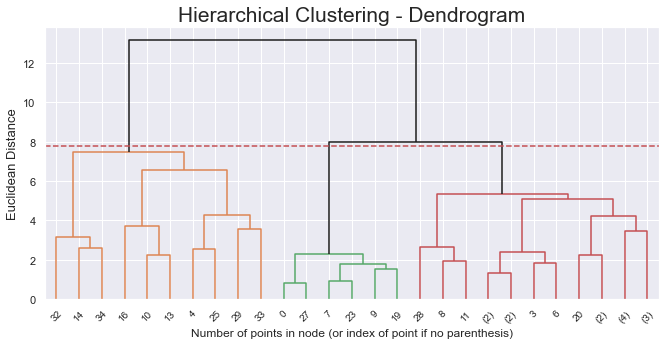

In [49]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)


for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 7.8
dendrogram(linkage_matrix, truncate_mode='level', labels=centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [50]:
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(centroids)
centroids['hclust_labels'] = hclust_labels

centroids

Dryred  Sweetred     Drywh   Sweetwh   Dessert    Exotic  hclust_labels
0   1.663722 -0.819784 -1.584204 -0.802051 -0.807011 -0.564888              2
1  -0.074263  0.021266 -0.362531  1.000074 -0.238982 -0.330736              1
2  -1.182647  1.084747  0.910022  1.055119 -0.083898 -0.231782              1
3  -0.996252 -0.047222  2.090042 -0.120191 -0.198274 -0.427923              1
4  -1.578606  2.623416 -0.492240  0.264510  2.606421  0.579144              0
5  -1.238951  1.306782  0.821632 -0.221779  1.292983 -0.144273              1
6  -0.647498 -0.114639  1.389106 -0.030805 -0.145808  1.236518              1
7   0.771276 -0.612485 -0.298675 -0.584769 -0.613419 -0.552362              2
8  -0.774170  0.838701 -0.099229  0.917667  0.688730  1.500213              1
9   1.195307 -0.619975 -1.057948 -0.634844 -0.606502  0.739083              2
10 -1.591934  0.004400 -0.371917  2.678325  2.605467  0.671011              0
11 -1.311981  0.492187  1.194836  0.564342  0.925227  2.756722              1
12 -0.262171  0.470737  0.487246 -0.299443 -0.159478 -0.491941              1
13 -1.721529  0.973440 -0.545313  2.495840  2.474489  2.678639              0
14 -1.530858  2.167051 -0.323202  2.913347 -0.055632  0.226601              0
15 -0.979745  0.601722 -0.340452  1.536969  1.306849 -0.217970              1
16 -1.652677  0.465281 -0.819142  0.646371  5.090418  1.899401              0
17 -0.346457  1.241803 -0.436682  0.005709  0.488422 -0.323164              1
18 -1.172186  0.144891  0.116747  0.129394  3.029429  0.198555              1
19  0.314359 -0.388329  0.112691 -0.370591 -0.348765  0.676951              2
20 -1.180780  2.959516 -0.363963  0.790905  0.336677  0.167386              1
21 -1.229269 -0.128283  1.356232  0.426877  1.191104 -0.137385              1
22 -0.534793 -0.282384  0.839104  0.451047  0.076647 -0.467471              1
23  0.477900 -0.103263 -0.617871 -0.192125 -0.130651 -0.474025              2
24 -0.243042 -0.261195 -0.074419 -0.024719  1.129830 -0.308927              1
25 -1.720784  2.878292 -0.424451  0.294569  2.626237  3.098671              0
26 -0.329370 -0.408478  1.336023 -0.403053 -0.334581 -0.561324              1
27  1.195661 -0.673932 -0.985412 -0.653369 -0.649622 -0.590102              2
28  0.339170 -0.246925 -0.206461 -0.165954 -0.262065  2.393602              1
29 -1.734646  5.291439 -0.730922  0.780422  0.243371  2.015007              0
30 -1.027935  2.050924  0.857103 -0.207049 -0.153399  0.487138              1
31  0.251697 -0.510257  0.443402 -0.486919 -0.448894 -0.595210              1
32 -1.634273  0.388864 -0.453796  4.949421  0.186285  1.445273              0
33 -1.634581  2.512195 -0.647789  2.830358  0.523772  2.878991              0
34 -1.114008 -0.187997  0.637111  2.492507 -0.038516  0.085593              0

In [51]:
cluster_mapper = centroids['hclust_labels'].to_dict()

# Mapping the hierarchical clusters on the centroids to the observations
df_km_behaviour['kmeans_labels'] = df_km_behaviour.apply(
    lambda row: cluster_mapper[(row['km_behaviour_labels'])], axis=1)

df_km_behaviour.drop('km_behaviour_labels', axis=1, inplace=True)

In [52]:
df_km_behaviour.groupby('kmeans_labels').mean()

Dryred  Sweetred     Drywh   Sweetwh   Dessert    Exotic
kmeans_labels                                                            
0             -1.550855  1.480606 -0.326329  2.070911  1.555292  1.338981
1             -0.492753  0.188449  0.639267  0.089610  0.168483 -0.019303
2              0.982386 -0.567614 -0.768858 -0.565474 -0.557546 -0.264190

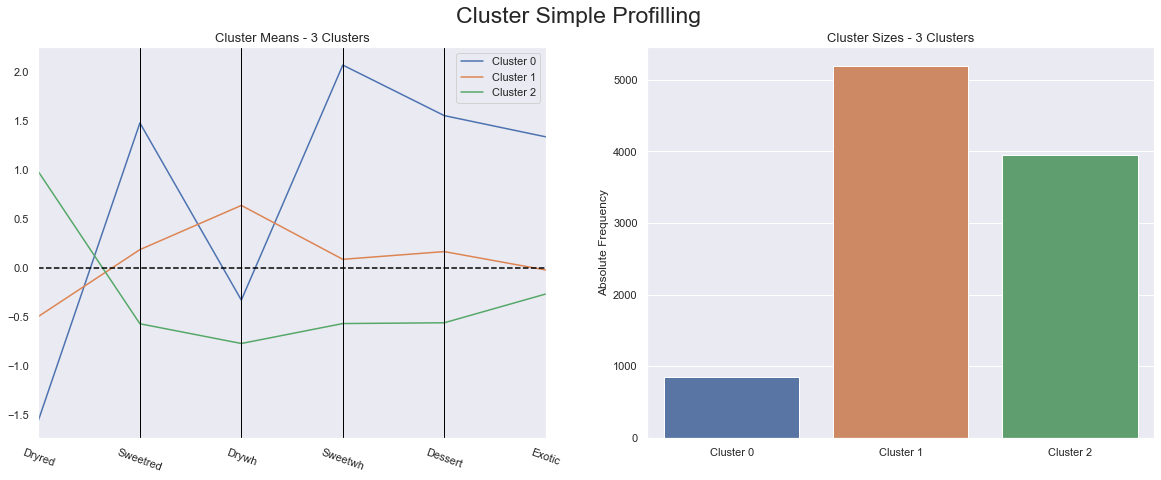

In [53]:
cluster_profiles(df_km_behaviour, ['kmeans_labels'], (20,7))

## Self Organizing Maps + Hierarchical

### Value Perspective

In [58]:
# Select an initial number of initial seeds, based on the random state
# defined in the previous cluster methods
np.random.seed(93)

sm_value = sompy.SOMFactory().build(
    df_value.values, 
    mapsize=[20, 20], 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=value_features
)

# Define a certain number of epochs so, the SOM algorithm converge
sm_value.train(n_job=-1, verbose='info', train_rough_len=200, train_finetune_len=200)

NameError: name 'sompy' is not defined

In [ ]:
# let's see the best number of cluster for hierarchical
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_value)


counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)


for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)


sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 130
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.show()

In [ ]:
# Perform Hierarchical on top of Som algorithm
hierclust = AgglomerativeClustering(n_clusters=2, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm_value.codebook.matrix)
sm_value.cluster_labels = nodeclus_labels  

hits  = HitMapView(8, 8,"Clustering",text_size=10)
hits.show(sm_value, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [ ]:
# Check the nodes with the respective cluster to which it belongs
nodes_value = sm_value.codebook.matrix

nodesh_value = pd.DataFrame(nodes_value, columns=value_features)
nodesh_value['som_h_label'] = nodeclus_labels
nodesh_value

In [ ]:
# Obtaining BMUs
bmus_map_value = sm_value.find_bmu(df_value[value_features])[0] 

df_bmus_value = pd.DataFrame(
    np.concatenate((df_value[value_features], np.expand_dims(bmus_map_value,1)), axis=1),
    index=df_value.index, columns=np.append(df_value[value_features].columns,"BMU")
)
df_bmus_value

In [ ]:
# Get cluster labels for each observation
df_somf_value = df_bmus_value.merge(nodesh_value['som_h_label'], 'left', left_on="BMU", right_index=True)

df_somf_value.drop('BMU', axis=1, inplace=True)

In [ ]:
df_somf_value.groupby('som_h_label').mean()

In [ ]:
cluster_profiles(df_somf_value, ['som_h_label'], (20,7))

### Behaviour Perspective

In [ ]:
np.random.seed(93)

sm_behaviour = sompy.SOMFactory().build(
    df_behaviour.values, 
    mapsize=[20, 20], 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=buying_behaviour_features
)
sm_behaviour.train(n_job=-1, verbose='info', train_rough_len=200, train_finetune_len=200)

In [ ]:
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_behaviour)


counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)


for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 85
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.show()

In [ ]:
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm_behaviour.codebook.matrix)
sm_behaviour.cluster_labels = nodeclus_labels 

hits  = HitMapView(8, 8,"Clustering",text_size=10)
hits.show(sm_behaviour, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [ ]:
nodes_behaviour = sm_behaviour.codebook.matrix

nodesh_behaviour = pd.DataFrame(nodes_behaviour, columns=buying_behaviour_features)
nodesh_behaviour['som_h_label'] = nodeclus_labels
nodesh_behaviour

In [ ]:
bmus_map_behaviour = sm_behaviour.find_bmu(df_behaviour)[0] 

df_bmus_behaviour = pd.DataFrame(
    np.concatenate((df_behaviour, np.expand_dims(bmus_map_behaviour,1)), axis=1),
    index=df_behaviour.index, columns=np.append(df_behaviour.columns,"BMU")
)
df_bmus_behaviour

In [ ]:
df_somf_behaviour = df_bmus_behaviour.merge(nodesh_behaviour['som_h_label'], 'left', left_on="BMU", right_index=True)

df_somf_behaviour.drop("BMU", axis=1, inplace=True)

In [ ]:
df_somf_behaviour.groupby('som_h_label').mean()

In [ ]:
cluster_profiles(df_somf_behaviour, ['som_h_label'], (20,7))

## Self Organizing Maps + K-means

### Value Perspective

In [ ]:
# Repeat the SOM creation process and defined above
np.random.seed(93)

sm_value = sompy.SOMFactory().build(
    df_value.values, 
    mapsize=[20, 20], 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=value_features
)

# Define a certain number of epochs so, the SOM algorithm converge
sm_value.train(n_job=-1, verbose='info', train_rough_len=200, train_finetune_len=200)

In [ ]:
# defining the number of clusters, using the inertia plot
inertia = []
for n_clus in range(1,11): 
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=93)
    kmclust.fit(df_value)
    inertia.append(kmclust.inertia_)
    

plt.figure(figsize=(9,5))
plt.plot(range(1,11),inertia,color = 'green')
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [ ]:
# As we can see by the inertia plot, the most suitable number of clusters is two
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state=93)
nodeclus_labels = kmeans.fit_predict(sm_value.codebook.matrix)
sm_value.cluster_labels = nodeclus_labels  

hits = HitMapView(8, 8,"Clustering", text_size=10)
hits.show(sm_value, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [ ]:
nodes_value = sm_value.codebook.matrix

nodesk_value = pd.DataFrame(nodes_value, columns=value_features)
nodesk_value['som_k_label'] = nodeclus_labels
nodesk_value

In [ ]:
bmus_map_value = sm_value.find_bmu(df_value)[0] 

df_bmus_value2 = pd.DataFrame(
    np.concatenate((df_value, np.expand_dims(bmus_map_value,1)), axis=1),
    index=df_value.index, columns=np.append(df_value.columns,"BMU")
)
df_bmus_value2

In [ ]:
df_somf_value2 = df_bmus_value2.merge(nodesk_value['som_k_label'], 'left', left_on="BMU", right_index=True)

df_somf_value2.drop('BMU', axis=1, inplace=True)

In [57]:
df_somf_value2.groupby('som_k_label')[value_features].mean()

NameError: name 'df_somf_value2' is not defined

In [ ]:
cluster_profiles(df_somf_value2, ['som_k_label'], (20,7))

### Behaviour Perspective

In [ ]:
np.random.seed(93)

sm_behaviour = sompy.SOMFactory().build(
    df_behaviour.values, 
    mapsize=[20, 20], 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=buying_behaviour_features
)
sm_behaviour.train(n_job=-1, verbose='info', train_rough_len=200, train_finetune_len=200)

In [ ]:
inertia = []
for n_clus in range(1,11): 
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=93)
    kmclust.fit(df_behaviour)
    inertia.append(kmclust.inertia_)
    

plt.figure(figsize=(9,5))
plt.plot(range(1,11),inertia,color = 'green')
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [ ]:
# Perform K-Means on top of SOM algorithm
# with the most suitable number of clusters, which is three
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=93)
nodeclus_labels = kmeans.fit_predict(sm_behaviour.codebook.matrix)
sm_behaviour.cluster_labels = nodeclus_labels  

hits = HitMapView(8, 8,"Clustering", text_size=10)
hits.show(sm_behaviour, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [ ]:
nodes_behaviour = sm_behaviour.codebook.matrix

nodesk_behaviour = pd.DataFrame(nodes_behaviour, columns=buying_behaviour_features)
nodesk_behaviour['som_k_label'] = nodeclus_labels
nodesk_behaviour

In [ ]:
bmus_map_behaviour = sm_behaviour.find_bmu(df_behaviour)[0] 

df_bmus_behaviour2 = pd.DataFrame(
    np.concatenate((df_behaviour, np.expand_dims(bmus_map_behaviour,1)), axis=1),
    index=df_behaviour.index, columns=np.append(df_behaviour.columns,"BMU")
)
df_bmus_behaviour2

In [ ]:
df_somf_behaviour2 = df_bmus_behaviour2.merge(nodesk_behaviour['som_k_label'], 'left', left_on="BMU", right_index=True)

df_somf_behaviour2.drop('BMU', axis=1, inplace=True)

In [ ]:
df_somf_behaviour2.groupby('som_k_label')[buying_behaviour_features].mean()

In [ ]:
cluster_profiles(df_somf_behaviour2, ['som_k_label'], (20,7))

## Mean Shift Clustering

### Value Perspective

In [ ]:
# Create the mean shift algorithm, by establishing a value for the quantile
# The quantile value needs to be tested, so we can stay with the appropraite value
# based on the number of clusters it returns
bandwidth_value = estimate_bandwidth(df_value, quantile=0.08, random_state=93, n_jobs=-1)
bandwidth_value

In [ ]:
# Perform mean-shift clustering with bandwidth set previously
ms_value = MeanShift(bandwidth=bandwidth_value, bin_seeding=True, n_jobs=4)
ms_value_labels = ms_value.fit_predict(df_value)

ms_n_clusters = len(np.unique(ms_value_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

In [ ]:
df_ms_value = pd.concat([df_value, pd.Series(ms_value_labels, name='ms_value_labels', index=df_value.index)], axis=1)

In [ ]:
cluster_profiles(df_ms_value, ['ms_value_labels'], (20,7))

### Behaviour Perspective

In [ ]:
bandwidth_behaviour = estimate_bandwidth(df_behaviour, quantile=0.0975, random_state=93, n_jobs=-1)
bandwidth_behaviour

In [ ]:
ms_behaviour = MeanShift(bandwidth=bandwidth_behaviour, bin_seeding=True, n_jobs=4)
ms_behaviour_labels = ms_behaviour.fit_predict(df_behaviour)

ms_n_clusters = len(np.unique(ms_behaviour_labels))
print("Number of estimated clusters : %d" % ms_n_clusters) 

## DBSCAN

### Value Perspective

In [ ]:
# Create the K-distance graph to find out
# the rigth epsilon value to work with
neigh = NearestNeighbors(n_neighbors= 2*len(value_features)-1)
neigh.fit(df_value)
distances, _ = neigh.kneighbors(df_value)
distances = np.sort(distances[:, -1])
plt.plot(distances,color = 'green')
plt.show()

In [ ]:
# Perform DBSCAN clustering, after analysing the previous graphs
# with an epsilon of 0.5 (elbow) , and a min_samples equivalent to double 
# of the total number of metric features that we have
dbscan = DBSCAN(eps=0.5, min_samples=2*len(value_features), n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_value)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

In [ ]:
Counter(dbscan_labels)  

### Behaviour Perspective

In [ ]:
neigh = NearestNeighbors(n_neighbors= 2*len(buying_behaviour_features)-1)
neigh.fit(df_behaviour)
distances, _ = neigh.kneighbors(df_behaviour)
distances = np.sort(distances[:, -1])
plt.plot(distances,color = 'green')
plt.show()

In [ ]:
dbscan = DBSCAN(eps=1.2, min_samples=2*len(value_features), n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_value)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

In [ ]:
Counter(dbscan_labels)  

#### As we can see from the clusters profiling, DBSCAN returns clusters solutions very imbalanced. As we can see we have in this last perspective only one cluster with all 10000 observations, so this is a very bad solution to consider in our final clusters. This solution will be not considered in the Comparison Step

## K-Means

### Value Perspective

In [ ]:
kmeans_value = KMeans(n_clusters=25, init = 'k-means++', n_init=20, random_state=93)
km_value_labels = kmeans_value.fit_predict(df_value)

In [ ]:
range_clusters = range(2,15)

In [ ]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=93)
    # fit the clusterer
    kmclust.fit(df_value)
    inertia.append(kmclust.inertia_)
    
plt.figure(figsize=(9,5))
plt.plot(pd.Series(inertia, index = range_clusters))
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [ ]:
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=93)
    cluster_labels = kmclust.fit_predict(df_value)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_value, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_value, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_value) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(pd.Series(avg_silhouette, index = range_clusters))
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [ ]:
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init = 'k-means++', n_init = 15, random_state= 93)
km_labels = kmclust.fit_predict(df_value)
km_labels

In [ ]:
df_concat = pd.concat((df_value, pd.Series(km_labels, name='labels')), axis=1)
df_concat.groupby('labels').mean()

In [ ]:
df_concat.groupby('labels').size()

In [ ]:
cluster_profiles(df_concat, ['labels'], (20,7))

### Behaviour Perspective

In [ ]:
kmeans_behaviour = KMeans(n_clusters=25, init = 'k-means++', n_init=20, random_state=93)
km_behaviour_labels = kmeans_behaviour.fit_predict(df_behaviour)

In [ ]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=93)
    # fit the clusterer
    kmclust.fit(df_behaviour)
    inertia.append(kmclust.inertia_)
    
plt.figure(figsize=(9,5))
plt.plot(pd.Series(inertia, index = range_clusters))
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [ ]:
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=93)
    cluster_labels = kmclust.fit_predict(df_behaviour)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_behaviour, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_behaviour, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_behaviour) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(pd.Series(avg_silhouette, index = range_clusters))
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [ ]:
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init = 'k-means++', n_init = 15, random_state= 93)
km_labels = kmclust.fit_predict(df_value)
km_labels

In [ ]:
df_concat = pd.concat((df_behaviour, pd.Series(km_labels, name='labels')), axis=1)
df_concat.groupby('labels').mean()

In [ ]:
df_concat.groupby('labels').size()

In [ ]:
cluster_profiles(df_concat, ['labels'], (20,7))

## Comparison

In [ ]:
# We need to compare all the solutions created for each perspective, so we can check
# which one of them gives the best results
df_value['kmeans/hierchical_labels'] = df_km_value['kmeans_labels'].copy()
df_value['som/hierchical_labels'] = df_somf_value['som_h_label'].copy()
df_value['som/kmeans_labels'] = df_somf_value2['som_k_label'].copy()
df_value['meanshift_labels'] = df_ms_value['ms_value_labels'].copy()
df_value['kmeanslabels'] = df_concat['labels'].copy()

In [ ]:
cluster_profiles(df_value, ['kmeans/hierchical_labels', 
                           'som/hierchical_labels',
                           'som/kmeans_labels',
                           'meanshift_labels', 
                           'kmeanslabels'], 
                 (15, 28),
                 compar_titles = ["K-means/Hierchical", 
                                  "SOM/Hierchical", 
                                  "SOM/K-means", 
                                  "MeanShift",
                                  "KMeans"])

In [ ]:
df_behaviour['kmeans/hierchical_labels'] = df_km_behaviour['kmeans_labels'].copy()
df_behaviour['som/hierchical_labels'] = df_somf_behaviour['som_h_label'].copy()
df_behaviour['som/kmeans_labels'] = df_somf_behaviour2['som_k_label'].copy()
df_behaviour['kmeanslabels'] = df_concat['labels'].copy()

In [ ]:
cluster_profiles(df_behaviour, ['kmeans/hierchical_labels', 
                           'som/hierchical_labels',
                           'som/kmeans_labels',
                               'kmeanslabels'], 
                 (15, 28),
                 compar_titles = ["K-means/Hierchical", 
                                  "SOM/Hierchical", 
                                  "SOM/K-means",
                                  "K-Means"])

In [ ]:
# Computing the R^2 of the cluster solution
df_nonoise = df_behaviour.loc[df_behaviour['kmeans/hierchical_labels'] != -1]
sst = get_ss(data_wine[buying_behaviour_features])  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='kmeans/hierchical_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

In [ ]:
# Computing the R^2 of the cluster solution
df_nonoise = df_behaviour.loc[df_behaviour['som/hierchical_labels'] != -1]
sst = get_ss(data_wine[buying_behaviour_features])  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='som/hierchical_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

In [ ]:
# Computing the R^2 of the cluster solution
df_nonoise = df_behaviour.loc[df_behaviour['som/kmeans_labels'] != -1]
sst = get_ss(data_wine[buying_behaviour_features])  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='som/kmeans_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

In [ ]:
df_nonoise = df_value.loc[df_value['som/kmeans_labels'] != -1]
sst = get_ss(data_wine[value_features])  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='som/kmeans_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

In [ ]:
# Computing the R^2 of the cluster solution
df_nonoise = df_value.loc[df_value['som/hierchical_labels'] != -1]
sst = get_ss(data_wine[value_features])  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='som/hierchical_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

In [ ]:
# Computing the R^2 of the cluster solution
df_nonoise = df_value.loc[df_value['kmeans/hierchical_labels'] != -1]
sst = get_ss(data_wine[value_features])  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='kmeans/hierchical_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

In [ ]:
# Computing the R^2 of the cluster solution
df_nonoise = df_value.loc[df_value['meanshift_labels'] != -1]
sst = get_ss(data_wine[value_features])  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='meanshift_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

## Merging the Perspectives using Hierarchical clustering

In [ ]:
# looking at the visualizations we choose to use for:
# Value Perspective - Mean Shift Method
# Behaviour Perspective - SOM & Hierchical

# Use hierarchical clustering, to merge the three best clustering solutions
data_wine['value_labels'] = df_value['meanshift_labels']
data_wine['behaviour_labels'] = df_behaviour['som/hierchical_labels']

In [ ]:
# Centroids of the concatenated cluster labels
df_centroids = data_wine.groupby(['value_labels', 'behaviour_labels'])\
    [metric_features2].mean()
df_centroids

In [ ]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

In [ ]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)


for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 2.7
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [ ]:
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=6
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids 

In [ ]:
cluster_mapper = df_centroids['hclust_labels'].to_dict()

datawine = data_wine.copy()

datawine['merged_labels'] = datawine.apply(
    lambda row: cluster_mapper[
        (row['value_labels'], row['behaviour_labels'])
    ], axis=1
)

datawine.groupby('merged_labels').mean()[metric_features2]

In [ ]:
# As we can see our merged clusters, are very balanced in terms of number of observations
Counter(datawine['merged_labels'])

In [ ]:
# Profilling each cluster (value, behaviour, merged)
cluster_profiles(
    df = datawine, 
    label_columns = ['value_labels', 'behaviour_labels', 'merged_labels'], 
    figsize = (28, 20), 
    compar_titles = ["Value clustering", "Behaviour clustering","Merged clusters"]
)

## Cluster visualization using t-SNE

In [ ]:
# Apply t-SNE to get a more realistic visualization of our clusters
two_dim = TSNE(random_state=93).fit_transform(datawine)

pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=datawine['merged_labels'], colormap='tab10', figsize=(8,8))
plt.show()